<a href="https://colab.research.google.com/github/yuki-tamaribuchi/stats_code_kata/blob/master/kaggle_titanic_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir /root/.kaggle
!cp drive/'My Drive'/kaggle.json /root/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 59.4MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 8.67MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 24.2MB/s]


In [3]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [4]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
sex_dummy=pd.get_dummies(train_df['Sex'])
pclass_dummy=pd.get_dummies(train_df['Pclass'],prefix='Pclass')
embarked_dummy=pd.get_dummies(train_df['Embarked'],prefix='Emb')

train_df=train_df.drop(['Ticket','Cabin','Name','Sex','Pclass','Embarked','Cabin'],axis=1)
train_df=pd.concat([train_df,sex_dummy,pclass_dummy,embarked_dummy],axis=1)

train_df['Age']=train_df['Age'].fillna(train_df['Age'].mean())

train_df.head()

X=train_df['Survived']
y=train_df.drop(['Survived'],axis=1)

In [8]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
female         0
male           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Emb_C          0
Emb_Q          0
Emb_S          0
dtype: int64

In [19]:
train_df

,PassengerId,Survived,Age,SibSp,Parch,Fare,female,male,Pclass_1,Pclass_2,Pclass_3,Emb_C,Emb_Q,Emb_S
0,1,0,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,1,0,1,0,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1
3,4,1,35.000000,1,0,53.1000,1,0,1,0,0,0,0,1
4,5,0,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,13.0000,0,1,0,1,0,0,0,1
887,888,1,19.000000,0,0,30.0000,1,0,1,0,0,0,0,1
888,889,0,29.699118,1,2,23.4500,1,0,0,0,1,0,0,1
889,890,1,26.000000,0,0,30.0000,0,1,1,0,0,1,0,0


In [21]:
train_dfs=train_df.iloc[:,2:].apply(lambda x:(x-x.mean()/x.std()),axis=0)

In [22]:
train_dfs

,Age,SibSp,Parch,Fare,female,male,Pclass_1,Pclass_2,Pclass_3,Emb_C,Emb_Q,Emb_S
0,19.715807,0.525721,-0.473408,6.601942,-0.737281,-0.354813,-0.565368,-0.509865,-0.107304,-0.481772,-0.30739,-0.613803
1,35.715807,0.525721,-0.473408,70.635242,0.262719,-1.354813,0.434632,-0.509865,-1.107304,0.518228,-0.30739,-1.613803
2,23.715807,-0.474279,-0.473408,7.276942,0.262719,-1.354813,-0.565368,-0.509865,-0.107304,-0.481772,-0.30739,-0.613803
3,32.715807,0.525721,-0.473408,52.451942,0.262719,-1.354813,0.434632,-0.509865,-1.107304,-0.481772,-0.30739,-0.613803
4,32.715807,-0.474279,-0.473408,7.401942,-0.737281,-0.354813,-0.565368,-0.509865,-0.107304,-0.481772,-0.30739,-0.613803
...,...,...,...,...,...,...,...,...,...,...,...,...
886,24.715807,-0.474279,-0.473408,12.351942,-0.737281,-0.354813,-0.565368,0.490135,-1.107304,-0.481772,-0.30739,-0.613803
887,16.715807,-0.474279,-0.473408,29.351942,0.262719,-1.354813,0.434632,-0.509865,-1.107304,-0.481772,-0.30739,-0.613803
888,27.414924,0.525721,1.526592,22.801942,0.262719,-1.354813,-0.565368,-0.509865,-0.107304,-0.481772,-0.30739,-0.613803
889,23.715807,-0.474279,-0.473408,29.351942,-0.737281,-0.354813,0.434632,-0.509865,-1.107304,0.518228,-0.30739,-1.613803


In [12]:
sex_dummy=pd.get_dummies(test_df['Sex'])
pclass_dummy=pd.get_dummies(test_df['Pclass'],prefix='Pclass')
embarked_dummy=pd.get_dummies(test_df['Embarked'],prefix='Emb')

test_df=test_df.drop(['Ticket','Cabin','Name','Sex','Pclass','Embarked','Cabin'],axis=1)
test_df=pd.concat([test_df,sex_dummy,pclass_dummy,embarked_dummy],axis=1)

test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())

test_df.head()

X_test=test_df

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [27]:
pca=PCA()
features=pd.DataFrame(pca.fit_transform(train_dfs),columns=['PC{}'.format(x+1) for x in range(len(train_dfs.columns))])

In [28]:
features.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-25.147281,-7.063144,0.206728,-0.772856,0.145001,0.028760,-0.282696,-0.081937,-0.104956,0.001923,-8.639186e-17,-3.615768e-16
1,39.289663,7.294899,0.236969,0.156432,-1.353783,0.284421,0.548673,-0.425224,-0.176657,-0.007540,6.620189e-16,3.092202e-16
2,-24.369790,-3.069575,-0.456542,0.509322,-0.564184,-0.010619,-0.829289,-0.095803,-0.228105,-0.002389,2.988755e-16,9.132125e-16
3,21.032423,4.762586,0.353687,0.140258,-0.894943,-0.583878,-0.292530,-0.737945,0.153773,-0.007521,8.530496e-16,9.482587e-16
4,-24.017135,5.928223,-0.359030,-0.377336,0.391424,0.166463,-0.416000,0.022811,-0.151997,0.000344,1.899617e-15,4.486929e-16


In [32]:
pd.DataFrame(pca.explained_variance_ratio_,index=['PC{}'.format(x+1) for x in range(len(train_dfs.columns))])

,0
PC1,9.353935e-01
PC2,6.346586e-02
PC3,4.774741e-04
PC4,1.989664e-04
PC5,1.478419e-04
PC6,1.277694e-04
PC7,9.561241e-05
PC8,5.708875e-05
PC9,3.558458e-05
PC10,2.783052e-07


In [37]:
pd.DataFrame(pca.components_,columns=train_dfs.columns,index=['PC{}'.format(x+1) for x in range(len(train_dfs.columns))])

,Age,SibSp,Parch,Fare,female,male,Pclass_1,Pclass_2,Pclass_3,Emb_C,Emb_Q,Emb_S
PC1,2.568839e-02,3.506510e-03,3.485568e-03,9.996289e-01,0.001747,-0.001747,0.005119,-0.000965,-0.004155,2.120997e-03,-6.630775e-04,-1.501847e-03
PC2,9.992666e-01,-2.140559e-02,-1.261746e-02,-2.563046e-02,-0.003801,0.003801,0.008722,0.000578,-0.009301,1.779726e-04,-5.230089e-05,-3.814482e-04
PC3,2.581735e-02,8.974924e-01,4.172176e-01,-4.864213e-03,0.067118,-0.067118,-0.045756,-0.008367,0.054123,-4.962039e-02,-5.869766e-03,5.610209e-02
PC4,2.822678e-03,-3.613443e-01,6.549962e-01,-3.149361e-03,0.455834,-0.455834,0.001775,0.105598,-0.107373,2.965610e-02,3.545434e-03,-3.531577e-02
PC5,5.282158e-04,-2.378178e-01,5.750810e-01,2.173914e-03,-0.475291,0.475291,-0.092616,-0.010671,0.103286,-1.957072e-01,-1.033899e-01,3.042464e-01
PC6,5.861869e-03,-6.129928e-02,1.786849e-01,2.487021e-04,-0.062147,0.062147,-0.036103,-0.503746,0.539849,3.297735e-01,1.860554e-01,-5.164178e-01
PC7,-5.716238e-03,5.534814e-02,1.722299e-01,-4.556107e-03,-0.232652,0.232652,0.215836,0.307006,-0.522843,4.884058e-01,-3.469558e-02,-4.527905e-01
PC8,7.068688e-03,-8.825688e-03,-3.594810e-02,5.036547e-03,-0.027183,0.027183,-0.738487,0.552514,0.185974,-2.245119e-02,2.487888e-01,-2.223859e-01
PC9,-3.823896e-03,-3.302014e-03,5.599659e-02,-7.906569e-04,-0.055311,0.055311,0.250258,-0.045204,-0.205055,-5.283291e-01,7.448526e-01,-2.237471e-01
PC10,-1.139249e-04,9.809167e-05,7.744892e-04,-6.941451e-07,-0.001879,0.001879,-0.002897,0.001620,0.001277,-5.756961e-01,-5.802943e-01,-5.760315e-01


In [39]:
import seaborn as sns

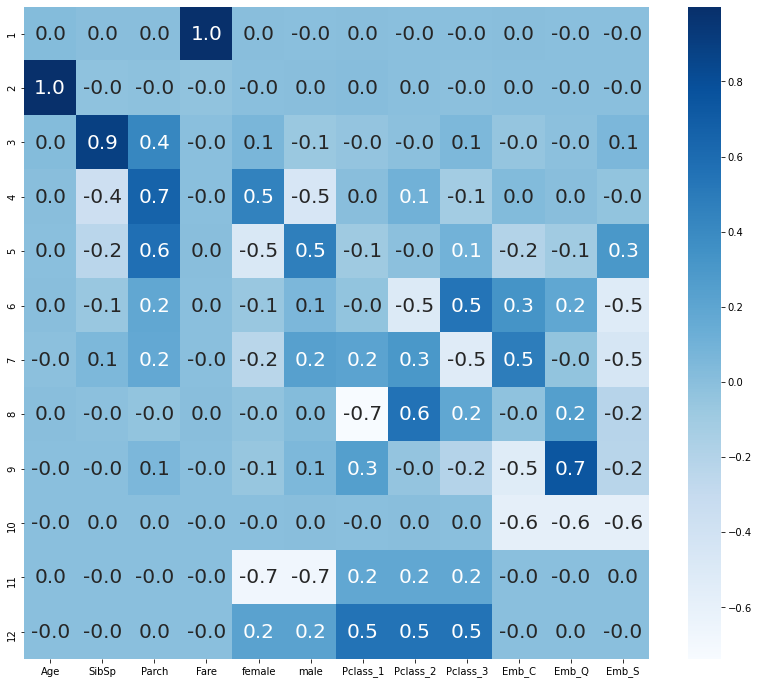

In [42]:
plt.figure(figsize=(14,12))
sns.heatmap(
    pca.components_,
    cmap='Blues',
    annot=True,
    annot_kws={'size':20},
    fmt='1.1f',
    xticklabels=train_df.loc[:,'Age':'Emb_S'].columns,
    yticklabels=['1','2','3','4','5','6','7','8','9','10','11','12']
)